<div style="text-align: center;">

# Customer Segmentation for Strategic Marketing
## An Analysis of Consumer Behavior, Shopping Methods, and Promotion Engagement
</div>

---

### **Contents Overview**
[Importing Libraries](#Importing-Libraries)
<br/>[Obtaining Data](#Obtaining-Data)
<br/>&emsp;[About the Dataset](#About-the-Dataset)
<br/>&emsp;[Dataset Feature Overview](#Dataset-Feature-Overview)
<br/>&emsp;[Attributes Definitions](#Attributes-Definitions)
<br/>[Data Cleaning](#Data-Cleaning)
<br/>&emsp;[Missing Values Treatement](#Missing-Values-Treatment)
<br/>&emsp;[Data Types](#Data-Types)
<br/>&emsp;[Dates and Times](#Dates-and-Times)
<br/>[Feature Engineering](#Feature-Engineering)
<br/>&emsp;[Nominal variables](#Nominal-variables)
<br/>&emsp;[Feature addition](#Feature-addition)
<br/>[Data Quality Assessment](#Data-Quality-Assessment)
<br/>&emsp;[Validating Data Ranges and Constraints](#Validating-Data-Ranges-and-Constraints)
<br/>&emsp;[Addressing Duplicates](#Addressing-Duplicates)
<br/>&emsp;[Outlier Treatment](#Outlier-Treatment)
<br/>[Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
<br/>&emsp;[Data types overview](#Data-types-overview)
<br/>&emsp;[1. Univariate Analysis](#1.-Univariate-Analysis)
<br/>&emsp;&emsp;[Distribution of nominal variables](#Distribution-of-nominal-variables)
<br/>&emsp;&emsp;[Distribution of continuous variables](#Distribution-of-continuous-variables)
<br/>&emsp;&emsp;[Distribution of discrete variables](#Distribution-of-discrete-variables)
<br/>&emsp;&emsp;[Distribution of binary variables](#Distribution-of-binary-variables)
<br/>&emsp;[2. Bivariate Analysis](#2.-Bivariate-Analysis)
<br/>&emsp;&emsp;[Correlatioin Matrix](#Correlatioin-Matrix)
<br/>&emsp;&emsp;[Relationship Between Customer's Income And Total Amount Spent](#Relationship-Between-Customer's-Income-And-Total-Amount-Spent)
<br/>&emsp;[3. Multivariate Analysis](#3.-Multivariate-Analysis)
<br/>&emsp;&emsp;[Education: Income, Spending, and Family](#Education:-Income,-Spending,-and-Family)
<br/>&emsp;&emsp;[Relationship Between Customer's Income And Total Amount Spent Based On Education Level](#Relationship-Between-Customer's-Income-And-Total-Amount-Spent-Based-On-Education-Level)
<br/>&emsp;&emsp;[Education and Purchase Behavior](#Education-and-Purchase-Behavior)
<br/>&emsp;&emsp;What's Next?

---

### **Research Objectivs**
The core objectives guiding this analysis are:
1. **Consumer Behavior Segmentation:** To identify unique customer segments based on their **product** purchasing patterns and preferences across various categories, and understand how these behaviors correlate with demographic and income characteristics.

2. **Buying Methods Segmentation:** To differentiate customer groups based on their preferred **purchasing channels**, revealing distinct shopping habits and their relationship with demographics and total expenditure.

3. **Promotions Participation Segmentation:** To categorize customers by their responsiveness and engagement with **marketing campaigns** and promotions, determining the demographic and behavioral factors that influence their participation, to optimize future promotional strategies.

---

#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Obtaining Data

In [3]:
# importing data
path = '../data/raw.csv'
df = pd.read_csv(path, sep="\t")

In [4]:
# verifying dataset
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


### About the Dataset

This dataset, sourced from [Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data) and provided by Dr. Omar Romero-Hernandez of U.C. Berkeley, offers a comprehensive view of customer behavior by organizing its attributes around key components of the **marketing mix**, often referred to as the "**4 Ps**": Product, Price, Promotion, and Place.
The Price - implied within "Amount Spent" context - though not explicitly listed as a separate group, it's a core element of the marketing mix that influences customer decisions.

The data is rich with:
* Consumer Behavior: Product categories, types of purchases.
* Buying Methods: Purchasing channels.
* Promotions Participation: Engagement with campaigns.
* Demographic Features.
* Income / Expenditure.

In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [6]:
df.shape

(2240, 27)

This dataset consists of 2240 datapoints and 27 attributes on customer's records from a groceries firm's database.

---

### **Dataset Feature Overview**

<div style="display: inline-block">

| <div style="width:200px">People</div> | <div style="width:200px">Products</div> | <div style="width:200px">Promotion</div> | <div style="width:200px">Place</div> |
|:--------------------------|:----------------------------|:-----------------------------|:-------------------------------|
| <li>`ID`</li>             | <li>`MntWines`</li>         | <li>`NumDealsPurchases`</li> | <li>`NumWebPurchases`</li>     |
| <li>`Year_Birth`</li>     | <li>`MntFruits`</li>        | <li>`AcceptedCmp3`</li>      | <li>`NumCatalogPurchases`</li> |
| <li>`Education`</li>      | <li>`MntMeatProducts`</li>  | <li>`AcceptedCmp4`</li>      | <li>`NumStorePurchases`</li>   |
| <li>`Marital_Status`</li> | <li>`MntFishProducts`</li>  | <li>`AcceptedCmp5`</li>      | <li>`NumWebVisitsMonth`</li>   |
| <li>`Income`</li>         | <li>`MntSweetProducts`</li> | <li>`AcceptedCmp1`</li>      |                                |
| <li>`Kidhome`</li>        | <li>`MntGoldProds`</li>     | <li>`AcceptedCmp2`</li>      |                                |
| <li>`Teenhome`</li>       |                             | <li>`Response`</li>          |                                |
| <li>`Dt_Customer`</li>    |                             |                              |                                |
| <li>`Recency`</li>        |                             |                              |                                |
| <li>`Complain`</li>       |                             |                              |                                |

</div>

---

### **Attributes Definitions**

#### ***People***
<div style="display: inline-block"> 

| <div style="width:150px">Feature Name</div>   | Definition                                                    |
|:----------------------------------------------|:--------------------------------------------------------------|
| `ID`                                          | Customer's unique identifier                                  |
| `Year_Birth`                                  | Customer's birth year                                         |
| `Education`                                   | Customer's education level                                    |
| `Marital_Status`                              | Customer's marital status                                     |
| `Income`                                      | Customer's yearly household income                            |
| `Kidhome`                                     | Number of children in customer's household                    |
| `Teenhome`                                    | Number of teenagers in customer's household                   |
| `Dt_Customer`                                 | Date of customer's enrollment with the company                |
| `Recency`                                     | Number of days since customer's last purchase                 |
| `Complain`                                    | 1 if the customer complained in the last 2 years, 0 otherwise |
</div>


#### ***Products***
<div style="display: inline-block"> 

| <div style="width:150px">Feature Name</div>   | Definition                             |
|:----------------------------------------------|:---------------------------------------|
| `MntWines`                                    | Amount spent on wine in last 2 years   |
| `MntFruits`                                   | Amount spent on fruits in last 2 years |
| `MntMeatProducts`                             | Amount spent on meat in last 2 years   |
| `MntFishProducts`                             | Amount spent on fish in last 2 years   |
| `MntSweetProducts`                            | Amount spent on sweets in last 2 years |
| `MntGoldProds`                                | Amount spent on gold in last 2 years   |
</div>


#### ***Promotion***
<div style="display: inline-block"> 

| <div style="width:150px">Feature Name</div>   | Definition                                                         |
|:----------------------------------------------|:-------------------------------------------------------------------|
| `NumDealsPurchases`                           | Number of purchases made with a discount                           |
| `AcceptedCmp3`                                | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  |
| `AcceptedCmp4`                                | 1 if customer accepted the offer in the 4th campaign, 0 otherwise  |
| `AcceptedCmp5`                                | 1 if customer accepted the offer in the 5th campaign, 0 otherwise  |
| `AcceptedCmp1`                                | 1 if customer accepted the offer in the 1st campaign, 0 otherwise  |
| `AcceptedCmp2`                                | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  |
| `Response`                                    | 1 if customer accepted the offer in the last campaign, 0 otherwise |
</div>


#### ***Place***
<div style="display: inline-block"> 

| <div style="width:180px">Feature Name</div>   | Definition                                              |
|:----------------------------------------------|:--------------------------------------------------------|
| `NumWebPurchases`                             | Number of purchases made through the company’s website  |
| `NumCatalogPurchases`                         | Number of purchases made using a catalogue              |
| `NumStorePurchases`                           | Number of purchases made directly in stores             |
| `NumWebVisitsMonth`                           | Number of visits to company’s website in the last month |
</div>

---

## Data Cleaning

In [7]:
# dataframe structure and information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Missing Values Treatment

In [8]:
# checking for null or missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [9]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

<div style="background-color: #e6ffe6; border-left: 5px solid #4CAF50; padding: 10px; margin: 10px 0; border-radius: 4px;">
    <strong>Quick Comment:</strong> We notice missing entries in the <code>Income</code> variable. The <code>Income</code> is an important feature in our analysis. We decide to fill missing values with the "median".
</div>

In [10]:
df["Income"] = df["Income"].fillna(df["Income"].median())

In [11]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

---

### Data Types

In [12]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
dtype: object

<div style="background-color: #e6ffe6; border-left: 5px solid #4CAF50; padding: 10px; margin: 10px 0; border-radius: 4px;">
    <strong>Quick Comment:</strong> <code>Dt_Customer</code> variable is not parsed as DateTime.
</div>

---

### Dates and Times

In [13]:
print(df['Dt_Customer'].dtypes)

object


In [14]:
df['Dt_Customer'].head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

In [15]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', dayfirst=True)

In [16]:
df['Dt_Customer'].head()

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [17]:
print(df['Dt_Customer'].dtypes)

datetime64[ns]


---

## Feature Engineering

In [18]:
df0 = df.copy()

In [19]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

### Nominal variables

**Education Levels**

In [20]:
# Frequency distribution of education levels
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

**Segmenting education levels in three groups:**

In [21]:
dict_edu={
    'Basic': 'Undergraduate'
    , '2n Cycle': 'Undergraduate'
    , 'Graduation': 'Graduate'
    , 'Master': 'Postgraduate'
    , 'PhD': 'Postgraduate'
}
df['Education'] = df['Education'].replace(dict_edu)

In [22]:
df['Education'].value_counts()

Education
Graduate         1127
Postgraduate      856
Undergraduate     257
Name: count, dtype: int64

**Marital Status**

In [23]:
# Frequency distribution of marital status
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

**One-Hot Encoding:**

In [24]:
# Feature addition for living situation
replace_dict = {
    'Married': 1
    , 'Together': 1
    , 'Single': 0
    , 'Divorced': 0
    , 'Widow': 0
    , 'Alone': 0
    , 'Absurd': 0
    , 'YOLO': 0
}
df['Is_Couple'] = df['Marital_Status'].map(pd.Series(replace_dict))

In [25]:
df['Is_Couple'].value_counts()

Is_Couple
1    1444
0     796
Name: count, dtype: int64

---

### Feature addition

In [26]:
# Feature addition for total children
df['Children'] = df['Kidhome'] + df['Teenhome']

In [27]:
df.Children.value_counts()

Children
1    1128
0     638
2     421
3      53
Name: count, dtype: int64

In [28]:
# Feature addition for total members in the household
df['Family_Size'] = np.where(df.Is_Couple > 0, 2, 1) + df['Children']

In [29]:
df.Family_Size.value_counts()

Family_Size
3    889
2    764
4    301
1    254
5     32
Name: count, dtype: int64

In [30]:
df[['Kidhome', 'Teenhome', 'Children', 'Is_Couple', 'Family_Size']]

,Kidhome,Teenhome,Children,Is_Couple,Family_Size
0,0,0,0,0,1
1,1,1,2,0,3
2,0,0,0,1,2
3,1,0,1,1,3
4,1,0,1,1,3
...,...,...,...,...,...
2235,0,1,1,1,3
2236,2,1,3,1,5
2237,0,0,0,0,1
2238,0,1,1,1,3


In [31]:
# Feature addition for parenthood
df['Has_Child'] = np.where(df['Children'] > 0, 1, 0)

In [32]:
df['Has_Child'].value_counts()

Has_Child
1    1602
0     638
Name: count, dtype: int64

#### Feature addition related to dates and times

In [33]:
# Last recorded date of customers' enrollments (the most recent)
df['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [34]:
# Maximum number of days since customer's last purchase
df['Recency'].max()

np.int64(99)

**Estimating the date of data collection**

In [35]:
# Maximum duration of customers enrollments relative to the last recorded date
df['Dt_Customer'].max() - df['Dt_Customer']

0      663 days
1      113 days
2      312 days
3      139 days
4      161 days
         ...   
2235   381 days
2236    19 days
2237   155 days
2238   156 days
2239   622 days
Name: Dt_Customer, Length: 2240, dtype: timedelta64[ns]

**Customer Tenure:** Calculate the number of days since the customer joined (`Dt_Customer`).

In [36]:
# Estimating duration of customers relationship with the company (days)
# Adding maximum duration of customers activity (days)
Customer_Tenure = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days + df['Recency'].max()
Customer_Tenure

0       762
1       212
2       411
3       238
4       260
       ... 
2235    480
2236    118
2237    254
2238    255
2239    721
Name: Dt_Customer, Length: 2240, dtype: int64

In [37]:
# Maximum duration of customer's relationship with the company (days)
Customer_Tenure.max()

np.int64(798)

In [38]:
# Estimating data collection date
# Adding the most duration of customers' relationship to the most recent enrollment record
data_collection_date = df['Dt_Customer'].max() + pd.DateOffset(days=Customer_Tenure.max())
data_collection_date

Timestamp('2016-09-04 00:00:00')

**Customer Lifespan**

Customer lifespan, refers to the duration of a customer's relationship with a business, from their first purchase to their last.

In [39]:
data_collection_date - df['Dt_Customer']

0      1461 days
1       911 days
2      1110 days
3       937 days
4       959 days
          ...   
2235   1179 days
2236    817 days
2237    953 days
2238    954 days
2239   1420 days
Name: Dt_Customer, Length: 2240, dtype: timedelta64[ns]

In [40]:
# Number of days a customer remains active relative to data collection date (days)
((data_collection_date - df['Dt_Customer']).dt.days) - df['Recency']

0       1403
1        873
2       1084
3        911
4        865
        ... 
2235    1133
2236     761
2237     862
2238     946
2239    1380
Length: 2240, dtype: int64

In [41]:
# Feature addition for customer lifespan relative to data collecion date (days)
df['Customer_Lifespan'] = ((data_collection_date - df['Dt_Customer']).dt.days) - df['Recency']

In [42]:
df[['Dt_Customer', 'Customer_Lifespan']].head()

,Dt_Customer,Customer_Lifespan
0,2012-09-04,1403
1,2014-03-08,873
2,2013-08-21,1084
3,2014-02-10,911
4,2014-01-19,865


**Age of customer**

In [43]:
# Feature addition for age of customer (years)
df['Age'] = data_collection_date.year - df['Year_Birth']

In [44]:
df[['Year_Birth', 'Age']].head()

,Year_Birth,Age
0,1957,59
1,1954,62
2,1965,51
3,1984,32
4,1981,35


In [45]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Is_Couple', 'Children',
       'Family_Size', 'Has_Child', 'Customer_Lifespan', 'Age'],
      dtype='object')

In [46]:
# Labeling (for clarity)
dict_product_amnt = {
    'MntWines': 'Wines'
    , 'MntFruits': 'Fruits'
    , 'MntMeatProducts': 'Meat'
    , 'MntFishProducts': 'Fish'
    , 'MntSweetProducts': 'Sweets'
    , 'MntGoldProds': 'Gold'
}

# renaming columns
df = df.rename(columns=dict_product_amnt)

In [47]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Is_Couple', 'Children',
       'Family_Size', 'Has_Child', 'Customer_Lifespan', 'Age'],
      dtype='object')

In [48]:
# Feature addition for total amount spent on products
df['Amnt_Total_Spent'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweets'] + df['Gold']

In [49]:
df[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Amnt_Total_Spent']].head()

,Wines,Fruits,Meat,Fish,Sweets,Gold,Amnt_Total_Spent
0,635,88,546,172,88,88,1617
1,11,1,6,2,1,6,27
2,426,49,127,111,21,42,776
3,11,4,20,10,3,5,53
4,173,43,118,46,27,15,422


In [50]:
# Feature addition for total number of purchases through all channels
df['Num_Total_Channels_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [51]:
df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Num_Total_Channels_Purchases']]

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Num_Total_Channels_Purchases
0,8,10,4,22
1,1,1,2,4
2,8,2,10,20
3,2,0,4,6
4,5,3,6,14
...,...,...,...,...
2235,9,3,4,16
2236,8,2,5,15
2237,2,3,13,18
2238,6,5,10,21


In [52]:
# Feature addition for total number of accepted campaigns
df['Num_Total_Accepted_Cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3']\
+ df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [53]:
df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Num_Total_Accepted_Cmp']]

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Num_Total_Accepted_Cmp
0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2235,0,0,0,0,0,0,0
2236,1,0,0,0,0,0,1
2237,0,0,0,1,0,0,1
2238,0,0,0,0,0,0,0


In [54]:
df['Num_Total_Accepted_Cmp'].value_counts()

Num_Total_Accepted_Cmp
0    1631
1     370
2     142
3      51
4      36
5      10
Name: count, dtype: int64

In [55]:
df.query('Num_Total_Accepted_Cmp == 5')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3'\
                                         , 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Num_Total_Accepted_Cmp']].head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Num_Total_Accepted_Cmp
252,1,1,0,1,1,1,5
430,1,1,0,1,1,1,5
559,1,1,0,1,1,1,5
824,1,1,0,1,1,1,5
990,1,1,0,1,1,1,5


---

## Data Quality Assessment

In [56]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Is_Couple', 'Children',
       'Family_Size', 'Has_Child', 'Customer_Lifespan', 'Age',
       'Amnt_Total_Spent', 'Num_Total_Channels_Purchases',
       'Num_Total_Accepted_Cmp'],
      dtype='object')

### Validating Data Ranges and Constraints

**Check for negative values per column**

In [57]:
(df[['Income', 'Amnt_Total_Spent']] < 0).sum()

Income              0
Amnt_Total_Spent    0
dtype: int64

In [58]:
(df[['Age', 'Year_Birth', 'Kidhome', 'Teenhome']] < 0).sum()

Age           0
Year_Birth    0
Kidhome       0
Teenhome      0
dtype: int64

In [59]:
(df[['Recency', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']] < 0).sum()

Recency         0
AcceptedCmp3    0
AcceptedCmp4    0
AcceptedCmp5    0
AcceptedCmp1    0
AcceptedCmp2    0
Complain        0
dtype: int64

**Check for zero values per column**

In [60]:
(df[['Income', 'Amnt_Total_Spent']] == 0).sum()

Income              0
Amnt_Total_Spent    0
dtype: int64

In [61]:
df[df['Num_Total_Channels_Purchases'] <= 0][[
    'Amnt_Total_Spent', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Num_Total_Channels_Purchases'
]]

,Amnt_Total_Spent,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Num_Total_Channels_Purchases
655,6,0,0,0,0
981,6,0,0,0,0
1245,8,0,0,0,0
1524,5,0,0,0,0
1846,9,0,0,0,0
2132,8,0,0,0,0


**Logic Error:** We notice 6 customers spent money, but did not make a single order.
<br/>We choose to delete them.

In [62]:
df.shape

(2240, 36)

In [63]:
df = df[df['Num_Total_Channels_Purchases'] != 0]

In [64]:
df.shape

(2234, 36)

### Cross-Column Consistency Checks

**Custom validation logic: Verify logical relationships between columns**

In [65]:
df[df['Income'] < df['Amnt_Total_Spent']]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Response,Is_Couple,Children,Family_Size,Has_Child,Customer_Lifespan,Age,Amnt_Total_Spent,Num_Total_Channels_Purchases,Num_Total_Accepted_Cmp


In [66]:
df[df['NumDealsPurchases'] > df['Num_Total_Channels_Purchases']][['NumDealsPurchases', 'Num_Total_Channels_Purchases']]

,NumDealsPurchases,Num_Total_Channels_Purchases
1042,15,1


**Logic Error:** Number of purchases made with a discount can not be greater than total number of all purchases.
<br/>We choose to drop the record.

In [67]:
df.shape

(2234, 36)

In [68]:
df = df[df['NumDealsPurchases'] <= df['Num_Total_Channels_Purchases']]

In [69]:
df.shape

(2233, 36)

In [70]:
df[df['Customer_Lifespan'] < df['Recency']]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Response,Is_Couple,Children,Family_Size,Has_Child,Customer_Lifespan,Age,Amnt_Total_Spent,Num_Total_Channels_Purchases,Num_Total_Accepted_Cmp


---

### Addressing Duplicates

In [71]:
# checking for duplicate values
df[df.duplicated()].count()

ID                              0
Year_Birth                      0
Education                       0
Marital_Status                  0
Income                          0
Kidhome                         0
Teenhome                        0
Dt_Customer                     0
Recency                         0
Wines                           0
Fruits                          0
Meat                            0
Fish                            0
Sweets                          0
Gold                            0
NumDealsPurchases               0
NumWebPurchases                 0
NumCatalogPurchases             0
NumStorePurchases               0
NumWebVisitsMonth               0
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Complain                        0
Response                        0
Is_Couple                       0
Children                        0
Family_Size   

---

### Outlier Treatment

**Continuous variables visual exploration**

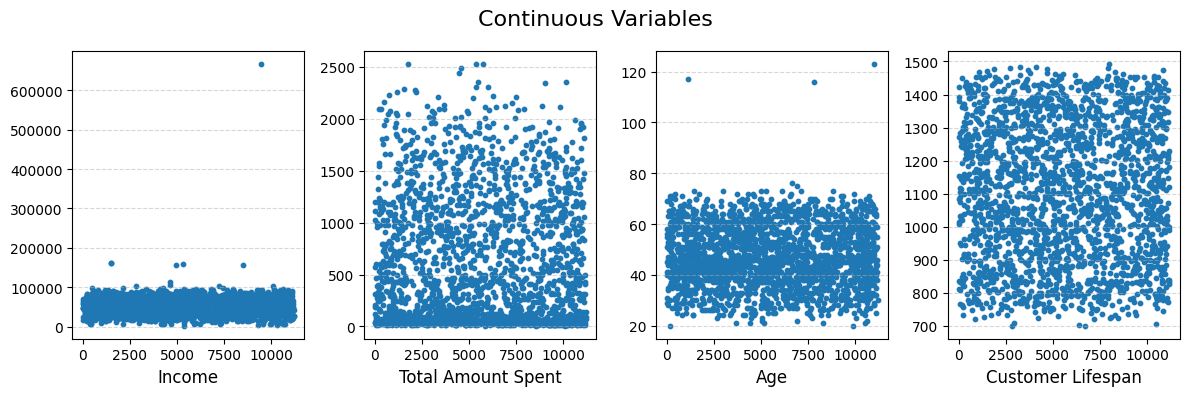

In [72]:
# Initialize layout
fig, axs = plt.subplots(1, 4, figsize=(12, 4), sharey=False)

axs[0].scatter(x=df['ID'], y=df['Income'], s=10)
axs[0].set_xlabel("Income", fontsize=12)

axs[1].scatter(x=df['ID'], y=df['Amnt_Total_Spent'], s=10)
axs[1].set_xlabel("Total Amount Spent", fontsize=12)

axs[2].scatter(x=df['ID'], y=df['Age'], s=10)
axs[2].set_xlabel("Age", fontsize=12)

axs[3].scatter(x=df['ID'], y=df['Customer_Lifespan'], s=10)
axs[3].set_xlabel("Customer Lifespan", fontsize=12)

fig.suptitle('Continuous Variables', fontsize=16)

for ax in axs.flat:
    # Apply grid to each individual Axes object
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

<div style="background-color: #e6ffe6; border-left: 5px solid #4CAF50; padding: 10px; margin: 10px 0; border-radius: 4px;">
    <strong>Observations:</strong> Clearly, there are a few outliers in the <code>Income</code> and <code>Age</code> features. 
</div>

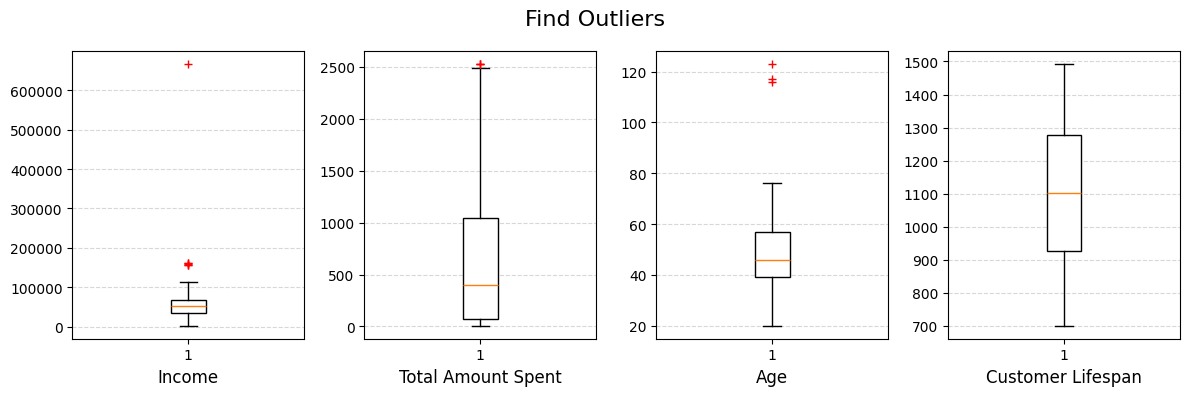

In [73]:
# Initialize layout
fig, axs = plt.subplots(1, 4, figsize=(12, 4), sharey=False)

boxplot = axs[0].boxplot(df['Income'], patch_artist=True)
plt.setp(boxplot['boxes'], facecolor='white', edgecolor='black')
plt.setp(boxplot['fliers'], marker='+', markeredgecolor='red')
axs[0].set_xlabel("Income", fontsize=12)

boxplot = axs[1].boxplot(df['Amnt_Total_Spent'], patch_artist=True)
plt.setp(boxplot['boxes'], facecolor='white', edgecolor='black')
plt.setp(boxplot['fliers'], marker='+', markeredgecolor='red')
axs[1].set_xlabel("Total Amount Spent", fontsize=12)

boxplot = axs[2].boxplot(df['Age'], patch_artist=True)
plt.setp(boxplot['boxes'], facecolor='white', edgecolor='black')
plt.setp(boxplot['fliers'], marker='+', markeredgecolor='red')
axs[2].set_xlabel("Age", fontsize=12)

boxplot = axs[3].boxplot(df['Customer_Lifespan'], patch_artist=True)
plt.setp(boxplot['boxes'], facecolor='white', edgecolor='black')
plt.setp(boxplot['fliers'], marker='+', markeredgecolor='red')
axs[3].set_xlabel("Customer Lifespan", fontsize=12)

fig.suptitle('Find Outliers', fontsize=16)

for ax in axs.flat:
    # Apply grid to each individual Axes object
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

<div style="background-color: #e6ffe6; border-left: 5px solid #4CAF50; padding: 10px; margin: 10px 0; border-radius: 4px;">
    <strong>Observations:</strong> Clearly, there are a few outliers in the <code>Income</code> and <code>Age</code> features. 
</div>

In [74]:
# Detection of outliers
df[(df['Income'] > 140000) | (df['Age'] > 100)][['Income', 'Year_Birth', 'Age']]

,Income,Year_Birth,Age
164,157243.0,1973,43
192,36640.0,1900,116
239,60182.0,1893,123
339,83532.0,1899,117
617,162397.0,1976,40
687,160803.0,1982,34
1300,157733.0,1971,45
1653,157146.0,1977,39
2233,666666.0,1977,39


#### **Outlier Trimming**

In [75]:
df1 = df.copy()

In [76]:
df.shape

(2233, 36)

In [77]:
# Remove outliers
df = df[~((df['Income'] > 140000) | (df['Age'] > 100))]

In [78]:
df.shape

(2224, 36)

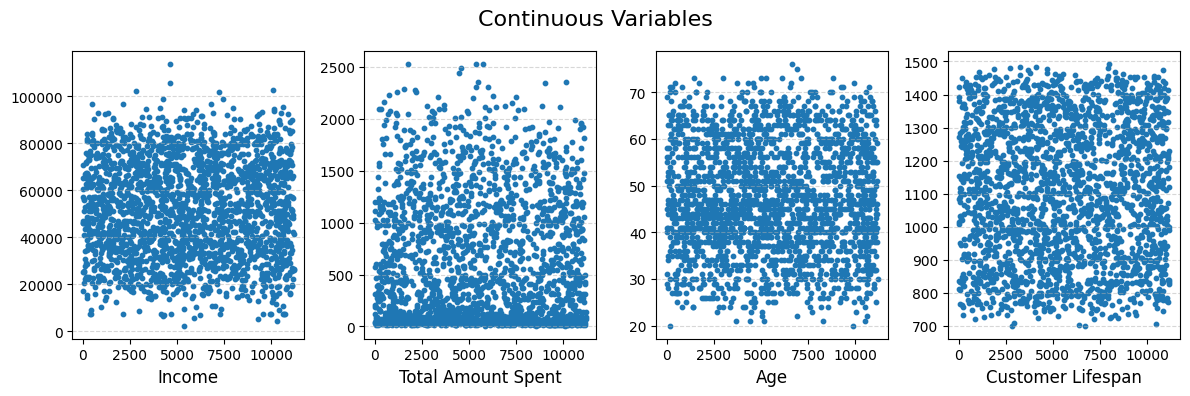

In [79]:
# Initialize layout
fig, axs = plt.subplots(1, 4, figsize=(12, 4), sharey=False)

axs[0].scatter(x=df['ID'], y=df['Income'], s=10)
axs[0].set_xlabel("Income", fontsize=12)

axs[1].scatter(x=df['ID'], y=df['Amnt_Total_Spent'], s=10)
axs[1].set_xlabel("Total Amount Spent", fontsize=12)

axs[2].scatter(x=df['ID'], y=df['Age'], s=10)
axs[2].set_xlabel("Age", fontsize=12)

axs[3].scatter(x=df['ID'], y=df['Customer_Lifespan'], s=10)
axs[3].set_xlabel("Customer Lifespan", fontsize=12)

fig.suptitle('Continuous Variables', fontsize=16)

for ax in axs.flat:
    # Apply grid to each individual Axes object
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

---

## Exploratory Data Analysis (EDA)

In [80]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Response,Is_Couple,Children,Family_Size,Has_Child,Customer_Lifespan,Age,Amnt_Total_Spent,Num_Total_Channels_Purchases,Num_Total_Accepted_Cmp
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,1,0,0,1,0,1403,59,1617,22,1
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,2,3,1,873,62,27,4,0
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,1,0,2,0,1084,51,776,20,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,1,1,3,1,911,32,53,6,0
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,1,1,3,1,865,35,422,14,0


In [81]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Is_Couple', 'Children',
       'Family_Size', 'Has_Child', 'Customer_Lifespan', 'Age',
       'Amnt_Total_Spent', 'Num_Total_Channels_Purchases',
       'Num_Total_Accepted_Cmp'],
      dtype='object')

### **Data types overview**

<div style="display: inline-block">

| <div style="width:170px">Nominal</div> | <div style="width:150px">Ordinal</div> | <div style="width:170px">Binary</div> | <div style="width:170px">Quantitative</div> | <div style="width:170px">Temporal</div> |
|:---|:---|:---|:---|:---|
| <li>`ID`</li> | <li>`Education`</li> | <li>`Is_Couple`</li> | <li>`Income`</li> | <li>`Year_Birth`</li> |
| <li>`Marital_Status`</li> | | <li>`Has_Child`</li> | <li>`Kidhome`</li> | <li>`Age`</li> |
| | | <li>`Complain`</li> | <li>`Teenhome`</li> | <li>`Dt_Customer`</li> |
| | | <li>`AcceptedCmp1`</li> | <li>`Children`</li> | <li>`Customer_Lifespan`</li> |
| | | <li>`AcceptedCmp2`</li> | <li>`Family_Size`</li> | <li>`Recency`</li> |
| | | <li>`AcceptedCmp3`</li> | <li>`Wines`</li> | |
| | | <li>`AcceptedCmp4`</li> | <li>`Fruits`</li> | |
| | | <li>`AcceptedCmp5`</li> | <li>`Meat`</li> | |
| | | <li>`Response`</li> | <li>`Fish`</li> | |
| | | | <li>`Sweets`</li> | |
| | | | <li>`Gold`</li> | |
| | | | <li>`Amnt_Total_Spent`</li> | |
| | | | <li>`NumWebPurchases`</li> | |
| | | | <li>`NumCatalogPurchases`</li> | |
| | | | <li>`NumStorePurchases`</li> | |
| | | | <li>`NumWebVisitsMonth`</li> | |
| | | | <li>`Num_Total_Channels_Purchases`</li> | |
| | | | <li>`NumDealsPurchases`</li> | |
| | | | <li>`Num_Total_Accepted_Cmp`</li> | |

</div>

***

## **1. Univariate Analysis**

### Frequency Distributions

#### **Distribution of nominal variables**

In [82]:
df.Education.value_counts()

Education
Graduate         1120
Postgraduate      849
Undergraduate     255
Name: count, dtype: int64

In [83]:
# relative frequency
df['Education'].value_counts(normalize = True)

Education
Graduate         0.503597
Postgraduate     0.381745
Undergraduate    0.114658
Name: proportion, dtype: float64

In [84]:
df.Marital_Status.value_counts()

Marital_Status
Married     860
Together    575
Single      477
Divorced    228
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [85]:
# relative frequency
df['Marital_Status'].value_counts(normalize = True)

Marital_Status
Married     0.386691
Together    0.258543
Single      0.214478
Divorced    0.102518
Widow       0.034622
Alone       0.001349
Absurd      0.000899
YOLO        0.000899
Name: proportion, dtype: float64

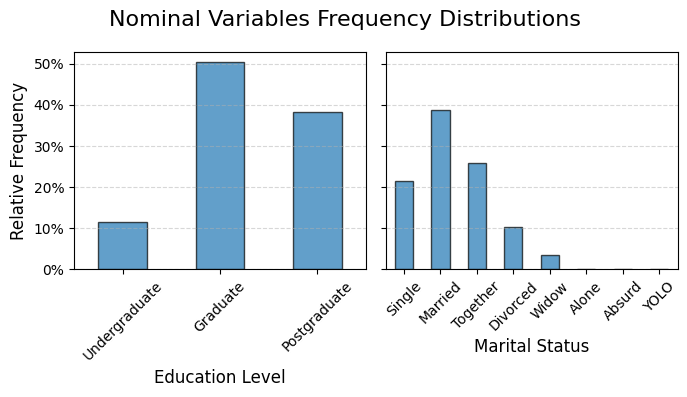

In [86]:
# Initialize layout
fig, axs = plt.subplots(1, 2, figsize=(7, 4), sharey=True)

custom_order = ['Undergraduate', 'Graduate', 'Postgraduate']
# Convert the 'Education' column to a Categorical type with the custom order
df['Education'] = pd.Categorical(df['Education'], categories=custom_order, ordered=True)
df['Education'].sort_values().value_counts(normalize=True, sort=False).plot(kind='bar', ax=axs[0], alpha=0.7, edgecolor="k")
axs[0].set_xlabel("Education Level", fontsize=12)
axs[0].set_ylabel('Relative Frequency', fontsize=12)
axs[0].tick_params(axis='x', labelrotation=45)

# Get current tick values
vals = axs[0].get_yticks()
# Format tick labels as percentages and set them
axs[0].set_yticks(vals)
axs[0].set_yticklabels(['{:.0%}'.format(val) for val in vals])
# --------------------------------------------------

custom_order = ['Single', 'Married', 'Together', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']
# Convert the 'Marital_Status' column to a Categorical type with the custom order
df['Marital_Status'] = pd.Categorical(df['Marital_Status'], categories=custom_order, ordered=True)
df['Marital_Status'].sort_values().value_counts(normalize=True, sort=False).plot(kind='bar', ax=axs[1], alpha=0.7, edgecolor="k")
axs[1].set_xlabel("Marital Status", fontsize=12)
axs[1].tick_params(axis='x', labelrotation=45)

fig.suptitle('Nominal Variables Frequency Distributions', fontsize=16)

for ax in axs.flat:
    # Apply grid to each individual Axes object
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

---

#### **Distribution of continuous variables**

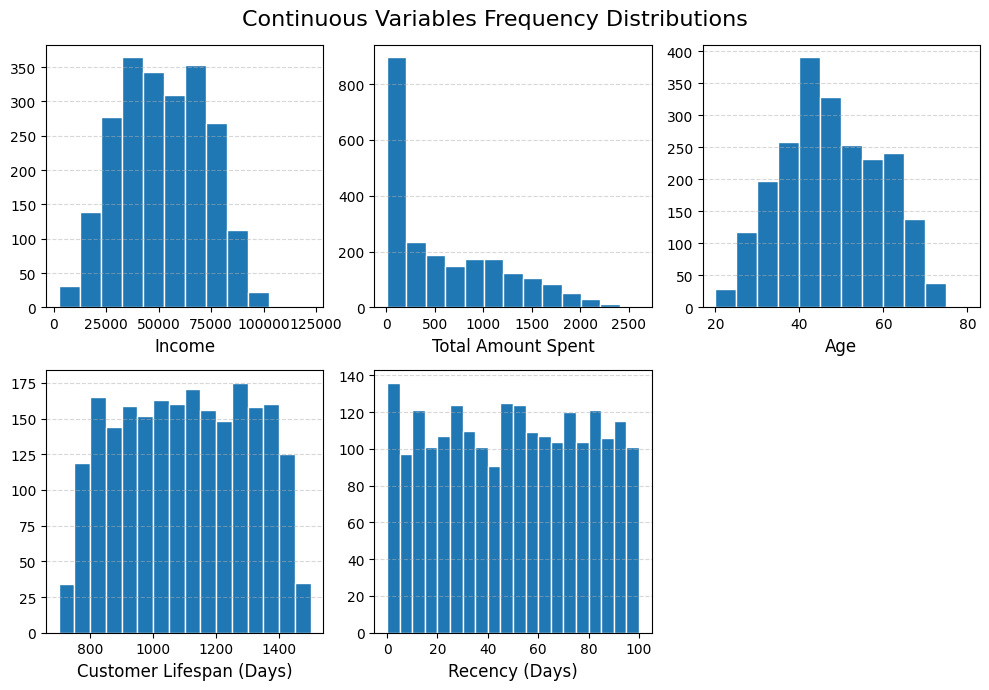

In [87]:
# Initialize layout
fig, axs = plt.subplots(2, 3, figsize=(10, 7), sharey=False)
# --------------------------------------------------

binwidth = 10000
start = df['Income'].min()
end = df['Income'].max() + binwidth
step = binwidth

bins = []
bin = start
while bin < end:
    bins.append(bin)
    bin += step

axes = axs[0,0]
axes.hist(df['Income'], bins = bins, edgecolor="white")
axes.set_xlabel("Income", fontsize=12)
# --------------------------------------------------

binwidth = 200
start = df['Amnt_Total_Spent'].min()
end = df['Amnt_Total_Spent'].max() + binwidth
step = binwidth

bins = []
bin = start
while bin < end:
    bins.append(bin)
    bin += step

axes = axs[0,1]
axes.hist(df['Amnt_Total_Spent'], bins = bins, edgecolor="white")
axes.set_xlabel("Total Amount Spent", fontsize=12)
# --------------------------------------------------

binwidth = 5
start = df['Age'].min()
end = df['Age'].max() + binwidth
step = binwidth

bins = []
bin = start
while bin < end:
    bins.append(bin)
    bin += step

axes = axs[0,2]
axes.hist(df['Age'], bins = bins, edgecolor="white")
axes.set_xlabel("Age", fontsize=12)
# --------------------------------------------------

binwidth = 50
start = df['Customer_Lifespan'].min()
end = df['Customer_Lifespan'].max() + binwidth
step = binwidth

bins = []
bin = start
while bin < end:
    bins.append(bin)
    bin += step

axes = axs[1,0]
axes.hist(df['Customer_Lifespan'], bins = bins, edgecolor="white")
axes.set_xlabel("Customer Lifespan (Days)", fontsize=12)
# --------------------------------------------------

binwidth = 5
start = df['Recency'].min()
end = df['Recency'].max() + binwidth
step = binwidth

bins = []
bin = start
while bin < end:
    bins.append(bin)
    bin += step

axes = axs[1,1]
axes.hist(df['Recency'], bins = bins, edgecolor="white")
axes.set_xlabel("Recency (Days)", fontsize=12)
# --------------------------------------------------

axes = axs[1,2]
axes.set_visible(False)
# --------------------------------------------------

fig.suptitle('Continuous Variables Frequency Distributions', fontsize=16)

for ax in axs.flat:
    # Apply grid to each individual Axes object
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

---

#### **Distribution of discrete variables**

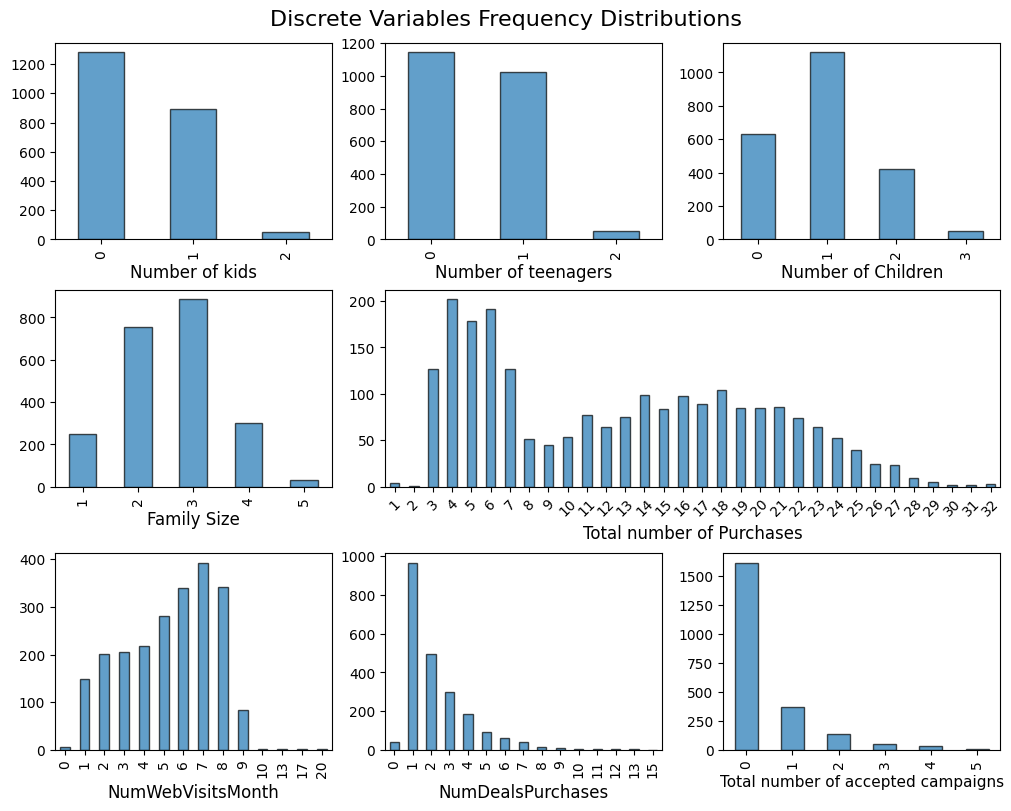

In [88]:
# Initialize layout
fig = plt.figure(layout="constrained")
gs = fig.add_gridspec(3, 3) # 3 rows, 3 columns

# change size of subplot
# set width of each subplot
fig.set_figwidth(10)
# set height of each subplot
fig.set_figheight(8)

axes = fig.add_subplot(gs[0,0])
# axes = axs[0,0]
df['Kidhome'].sort_values(ignore_index=True, ascending=True).value_counts(sort=False)\
    .plot(kind='bar', ax=axes, alpha=0.7, edgecolor="k")
axes.set_xlabel("Number of kids", fontsize=12)

axes = fig.add_subplot(gs[0,1])
# axes = axs[0,1]
df['Teenhome'].sort_values(ignore_index=True, ascending=True).value_counts(sort=False)\
    .plot(kind='bar', ax=axes, alpha=0.7, edgecolor="k")
axes.set_xlabel("Number of teenagers", fontsize=12)

axes = fig.add_subplot(gs[0,2])
# axes = axs[0,2]
df['Children'].sort_values(ignore_index=True, ascending=True).value_counts(sort=False)\
    .plot(kind='bar', ax=axes, alpha=0.7, edgecolor="k")
axes.set_xlabel("Number of Children", fontsize=12)

axes = fig.add_subplot(gs[1,0])
# axes = axs[1,0]
df['Family_Size'].sort_values(ignore_index=True, ascending=True).value_counts(sort=False)\
    .plot(kind='bar', ax=axes, alpha=0.7, edgecolor="k")
axes.set_xlabel("Family Size", fontsize=12)

axes = fig.add_subplot(gs[1, 1:])
# axes = axs[1,1]
df['Num_Total_Channels_Purchases'].sort_values(ignore_index=True, ascending=True).value_counts(sort=False)\
    .plot(kind='bar', ax=axes, alpha=0.7, edgecolor="k")
axes.set_xlabel("Total number of Purchases", fontsize=12)
axes.tick_params(axis='x', labelrotation=45)

axes = fig.add_subplot(gs[2,0])
# axes = axs[1,2]
df['NumWebVisitsMonth'].sort_values(ignore_index=True, ascending=True).value_counts(sort=False)\
    .plot(kind='bar', ax=axes, alpha=0.7, edgecolor="k")
axes.set_xlabel("NumWebVisitsMonth", fontsize=12)

axes = fig.add_subplot(gs[2,1])
# axes = axs[2,0]
df['NumDealsPurchases'].sort_values(ignore_index=True, ascending=True).value_counts(sort=False)\
    .plot(kind='bar', ax=axes, alpha=0.7, edgecolor="k")
axes.set_xlabel("NumDealsPurchases", fontsize=12)

axes = fig.add_subplot(gs[2,2])
# axes = axs[2,1]
df['Num_Total_Accepted_Cmp'].sort_values(ignore_index=True, ascending=True).value_counts(sort=False)\
    .plot(kind='bar', ax=axes, alpha=0.7, edgecolor="k")
axes.set_xlabel("Total number of accepted campaigns", fontsize=11)

fig.suptitle('Discrete Variables Frequency Distributions', fontsize=16)

for ax in axs.flat:
    # Apply grid to each individual Axes object
    ax.grid(axis='y', linestyle='--', alpha=0.5)

# plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

---

#### **Distribution of binary variables**

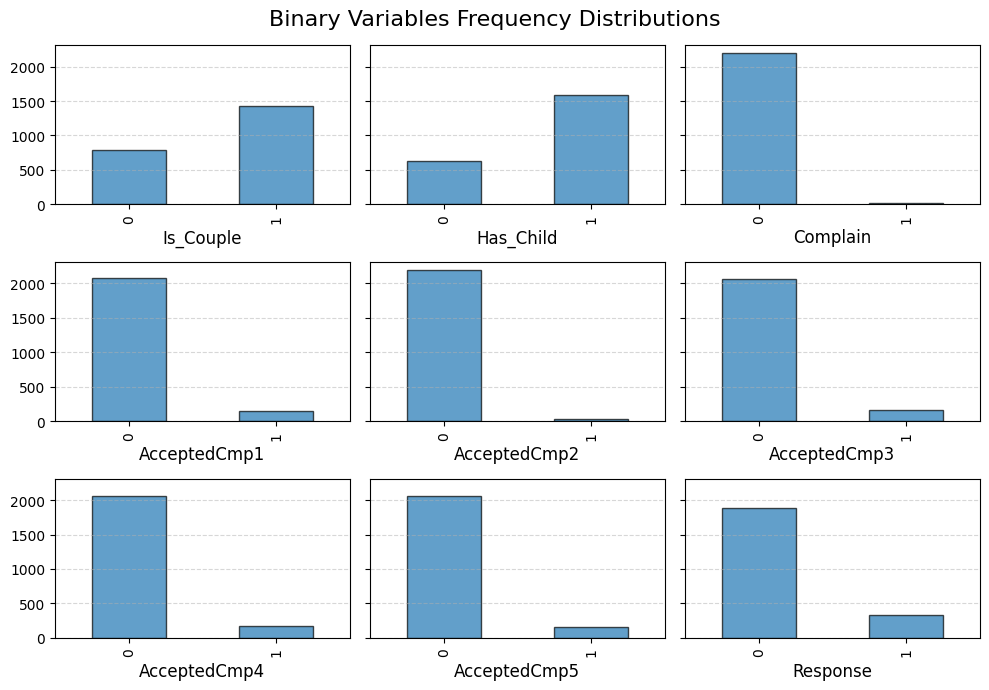

In [89]:
# Initialize layout
fig, axs = plt.subplots(3, 3, figsize=(10, 7), sharey=True)

axes = axs[0,0]
df['Is_Couple'].sort_values(ignore_index=True, ascending=True).value_counts(sort=False)\
    .plot(kind='bar', ax=axes, alpha=0.7, edgecolor="k")
axes.set_xlabel("Is_Couple", fontsize=12)

axes = axs[0,1]
df['Has_Child'].sort_values(ignore_index=True, ascending=True).value_counts(sort=False)\
    .plot(kind='bar', ax=axes, alpha=0.7, edgecolor="k")
axes.set_xlabel("Has_Child", fontsize=12)

axes = axs[0,2]
df['Complain'].sort_values(ignore_index=True, ascending=True).value_counts(sort=False)\
    .plot(kind='bar', ax=axes, alpha=0.7, edgecolor="k")
axes.set_xlabel("Complain", fontsize=12)

axes = axs[1,0]
df['AcceptedCmp1'].sort_values(ignore_index=True, ascending=True).value_counts(sort=False)\
    .plot(kind='bar', ax=axes, alpha=0.7, edgecolor="k")
axes.set_xlabel("AcceptedCmp1", fontsize=12)

axes = axs[1,1]
df['AcceptedCmp2'].sort_values(ignore_index=True, ascending=True).value_counts(sort=False)\
    .plot(kind='bar', ax=axes, alpha=0.7, edgecolor="k")
axes.set_xlabel("AcceptedCmp2", fontsize=12)

axes = axs[1,2]
df['AcceptedCmp3'].sort_values(ignore_index=True, ascending=True).value_counts(sort=False)\
    .plot(kind='bar', ax=axes, alpha=0.7, edgecolor="k")
axes.set_xlabel("AcceptedCmp3", fontsize=12)

axes = axs[2,0]
df['AcceptedCmp4'].sort_values(ignore_index=True, ascending=True).value_counts(sort=False)\
    .plot(kind='bar', ax=axes, alpha=0.7, edgecolor="k")
axes.set_xlabel("AcceptedCmp4", fontsize=12)

axes = axs[2,1]
df['AcceptedCmp5'].sort_values(ignore_index=True, ascending=True).value_counts(sort=False)\
    .plot(kind='bar', ax=axes, alpha=0.7, edgecolor="k")
axes.set_xlabel("AcceptedCmp5", fontsize=12)

axes = axs[2,2]
df['Response'].sort_values(ignore_index=True, ascending=True).value_counts(sort=False)\
    .plot(kind='bar', ax=axes, alpha=0.7, edgecolor="k")
axes.set_xlabel("Response", fontsize=12)

fig.suptitle('Binary Variables Frequency Distributions', fontsize=16)

for ax in axs.flat:
    # Apply grid to each individual Axes object
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

---

## **2. Bivariate Analysis**

### Feature correlation

<div style="background-color: #e6ffe6; border-left: 5px solid #4CAF50; padding: 10px; margin: 10px 0; border-radius: 4px;">
    <strong>Note:</strong> Correlation matrix is used for numerical variables (excluding nominal attributes)
</div>

#### Feature Selection (Irrelevant Features Removal)

In [90]:
df.dtypes

ID                                       int64
Year_Birth                               int64
Education                             category
Marital_Status                        category
Income                                 float64
Kidhome                                  int64
Teenhome                                 int64
Dt_Customer                     datetime64[ns]
Recency                                  int64
Wines                                    int64
Fruits                                   int64
Meat                                     int64
Fish                                     int64
Sweets                                   int64
Gold                                     int64
NumDealsPurchases                        int64
NumWebPurchases                          int64
NumCatalogPurchases                      int64
NumStorePurchases                        int64
NumWebVisitsMonth                        int64
AcceptedCmp3                             int64
AcceptedCmp4 

In [91]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Is_Couple', 'Children',
       'Family_Size', 'Has_Child', 'Customer_Lifespan', 'Age',
       'Amnt_Total_Spent', 'Num_Total_Channels_Purchases',
       'Num_Total_Accepted_Cmp'],
      dtype='object')

In [92]:
# Subset the DataFrame
sub_df_numeric = df[[
    'Income', 'Amnt_Total_Spent', 'Age', 'Is_Couple', 'Has_Child'
    , 'Children', 'Family_Size', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
    , 'NumWebVisitsMonth', 'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3'
    , 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Customer_Lifespan'
]].copy()

#### **Correlatioin Matrix**

In [93]:
# Correlation Matrix
corr_mtrx = sub_df_numeric.corr()
corr_mtrx

,Income,Amnt_Total_Spent,Age,Is_Couple,Has_Child,Children,Family_Size,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Customer_Lifespan
Income,1.000000,0.821052,0.211377,-0.017210,-0.415491,-0.352180,-0.301290,0.490103,0.707178,0.680710,-0.641320,-0.117362,0.343574,0.110270,-0.012664,0.231132,0.416100,0.173457,-0.028132,-0.029102
Amnt_Total_Spent,0.821052,1.000000,0.115843,-0.022843,-0.527787,-0.501667,-0.428293,0.523090,0.795308,0.681080,-0.507938,-0.073352,0.383276,0.136371,0.053221,0.254279,0.470060,0.266220,-0.034050,0.152979
Age,0.211377,0.115843,1.000000,0.000030,-0.012585,0.094780,0.078654,0.152872,0.139884,0.138200,-0.119393,0.081410,0.007769,0.007462,-0.061674,0.063983,-0.015869,-0.019238,0.004316,-0.016511
Is_Couple,-0.017210,-0.022843,0.000030,1.000000,0.055266,0.037203,0.559081,-0.001964,-0.018954,0.003590,0.016279,0.029424,0.007968,-0.002909,-0.018655,-0.006255,0.016173,-0.151285,0.000949,-0.008577
Has_Child,-0.415491,-0.527787,-0.012585,0.055266,1.000000,0.797054,0.690498,-0.075681,-0.466964,-0.296257,0.501975,0.418737,-0.280652,-0.082195,-0.006993,-0.082143,-0.349851,-0.207784,0.017605,0.001067
Children,-0.352180,-0.501667,0.094780,0.037203,0.797054,1.000000,0.849339,-0.151683,-0.453533,-0.330184,0.436204,0.470510,-0.226608,-0.070453,-0.021361,-0.088805,-0.286296,-0.171216,0.031336,-0.028052
Family_Size,-0.301290,-0.428293,0.078654,0.559081,0.690498,0.849339,1.000000,-0.126887,-0.386303,-0.272053,0.370512,0.405919,-0.183805,-0.059991,-0.027577,-0.076985,-0.228993,-0.221966,0.026500,-0.027805
NumWebPurchases,0.490103,0.523090,0.152872,-0.001964,-0.075681,-0.151683,-0.126887,1.000000,0.409908,0.495633,-0.051135,0.265432,0.153809,0.033367,0.039965,0.154388,0.137548,0.146025,-0.014069,0.191138
NumCatalogPurchases,0.707178,0.795308,0.139884,-0.018954,-0.466964,-0.453533,-0.386303,0.409908,1.000000,0.560799,-0.535251,-0.049385,0.325120,0.105575,0.111890,0.148133,0.339073,0.234755,-0.018467,0.089187
NumStorePurchases,0.680710,0.681080,0.138200,0.003590,-0.296257,-0.330184,-0.272053,0.495633,0.560799,1.000000,-0.439580,0.092882,0.182038,0.084668,-0.071270,0.177902,0.215259,0.035139,-0.012537,0.107292


In [94]:
# creating mask for the upper triangle
mask = np.triu(np.ones_like(corr_mtrx, dtype=bool))

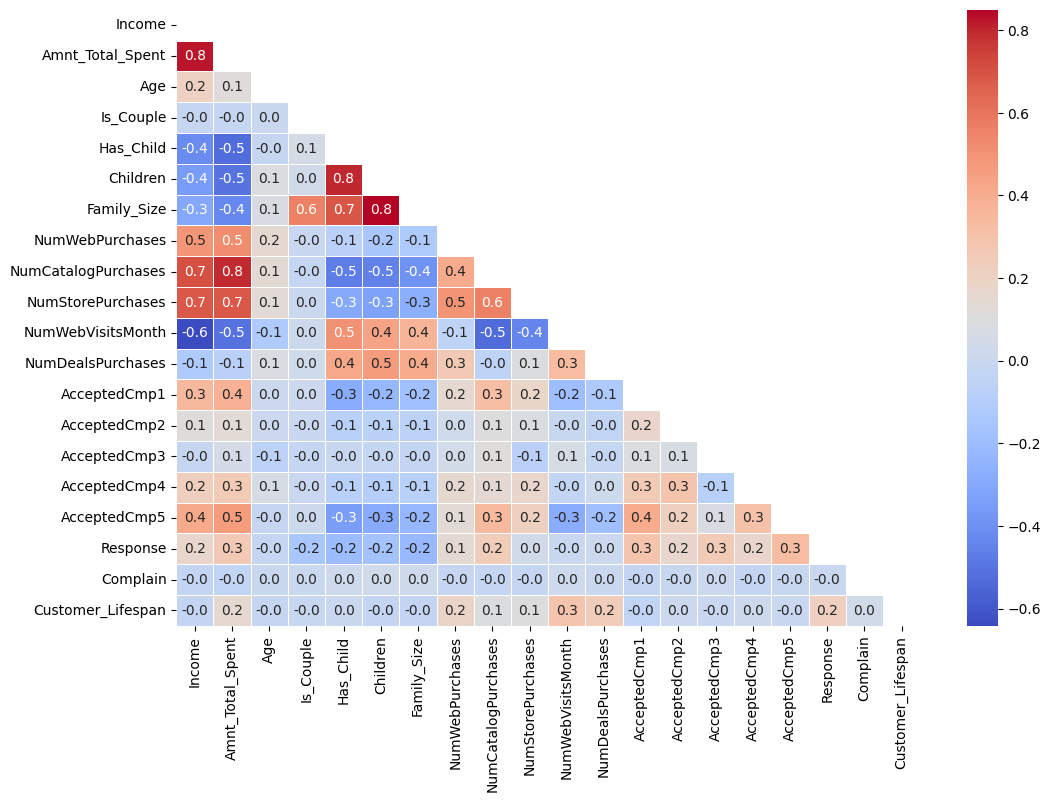

In [95]:
# Initialize layout
fig, ax = plt.subplots(figsize=(12, 8))

# masked heatmap
sns.heatmap(
    corr_mtrx
    , ax=ax
    , mask=mask
    , annot=True
    , cmap='coolwarm'
    , fmt=".1f"
    , linewidths=0.5
    , xticklabels=corr_mtrx.columns.values
    , yticklabels=corr_mtrx.columns.values
)
           
# plt.title("Correlation matrix")

plt.show()

<div style="background-color: #e6ffe6; border-left: 5px solid #4CAF50; padding: 10px; margin: 10px 0; border-radius: 4px;">
    <strong>Observations:</strong> The heatmap illustrates a strong connection between income and overall customer spending, suggesting that <strong>income</strong> is a critical factor influencing <strong>expenditure</strong>.
</div>

---

#### **Relationship Between Customer's Income And Total Amount Spent**

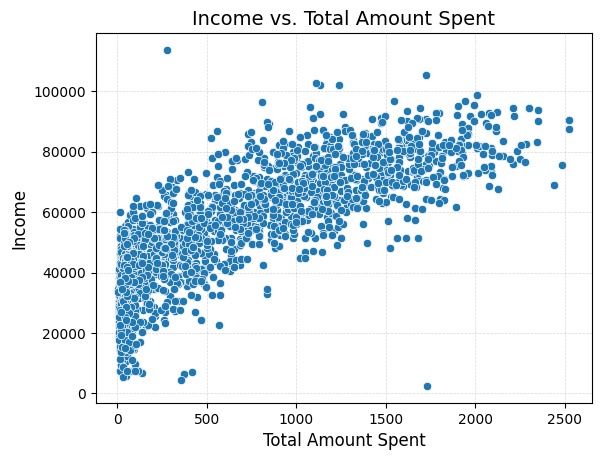

In [96]:
sns.scatterplot(
    data=df
    , x=df['Amnt_Total_Spent']
    , y=df['Income']
)

plt.xlabel('Total Amount Spent', fontsize=12)
plt.ylabel('Income', fontsize=12)

plt.title('Income vs. Total Amount Spent', fontsize=14)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.show()

<div style="background-color: #e6ffe6; border-left: 5px solid #4CAF50; padding: 10px; margin: 10px 0; border-radius: 4px;">
    <strong>Observations:</strong> The scatter graph illustrates a positive correlation between income and expenditure, indicating that as income increases, expenditure tends to rise as well.
</div>

---

## **3. Multivariate Analysis**

<div style="background-color: #e6ffe6; border-left: 5px solid #4CAF50; padding: 10px; margin: 10px 0; border-radius: 4px;">
    <strong>Note:</strong> Based on the correlation heatmap, we select correlated variables for a deeper analysis of their relationships with categorical variables.
</div>

In [97]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Is_Couple', 'Children',
       'Family_Size', 'Has_Child', 'Customer_Lifespan', 'Age',
       'Amnt_Total_Spent', 'Num_Total_Channels_Purchases',
       'Num_Total_Accepted_Cmp'],
      dtype='object')

In [98]:
# Subset the DataFrame
sub_df_catg = df[[
    'Education', 'Income', 'Amnt_Total_Spent', 'Has_Child', 'Children', 'Is_Couple', 'Family_Size'
    , 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'
]].copy()

#### **Education: Income, Spending, and Family**

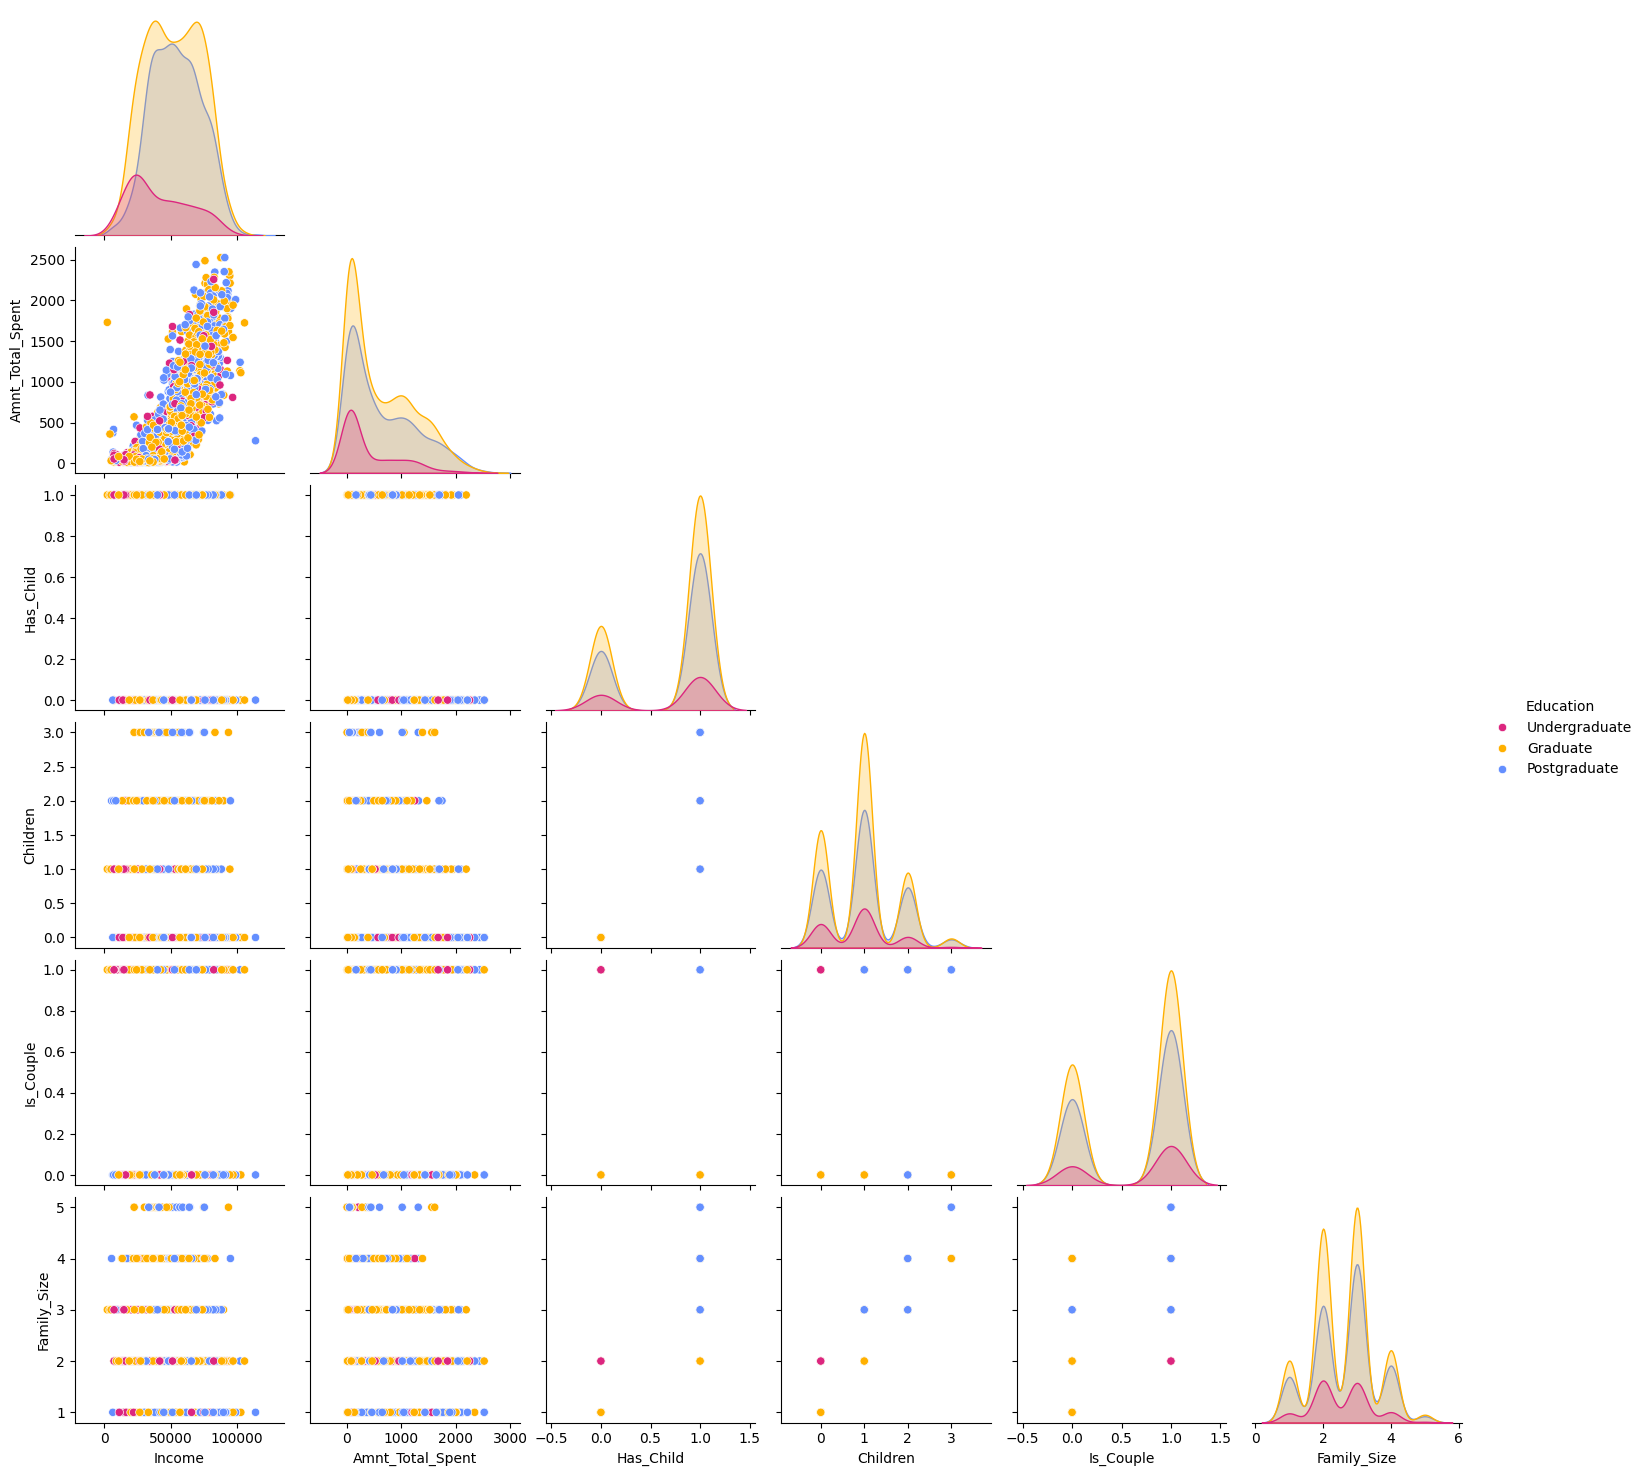

In [99]:
custom_palette = ["#dc267f", "#ffb000", "#648fff"]

sns.pairplot(
    sub_df_catg
    , hue='Education'
    , vars=['Income', 'Amnt_Total_Spent', 'Has_Child', 'Children', 'Is_Couple', 'Family_Size']
    , corner=True
    , palette=custom_palette
)

plt.show()

<!-- Quick Comment - Summary - Key Findings - Insights - Results - Takeaways - Observations - Analysis Summary - Executive Summary -->

<div style="background-color: #e6ffe6; border-left: 5px solid #4CAF50; padding: 10px; margin: 10px 0; border-radius: 4px;">
    <strong>Observations:</strong> We observe strong correlations between <strong>education level</strong> and various customer attributes, including income, spending, and family size.

* The analysis indicates that customers with an **undergraduate education** level generally **spend less** compared to those with higher education levels. This is largely due to the fact that undergraduate customers often have lower earnings, which in turn influences their spending behavior.
* **Higher educational attainment** not only correlates with increased earning potential but also influences lifestyle choices that lead to larger family units and greater expenditure.
* Significantly, it's also apparent that customers with a **graduate education** level have **the highest income, total spending, number of children, and family size**. This group represents a particularly high-value segment.
</div>

---

#### **Relationship Between Customer's Income And Total Amount Spent Based On Education Level**

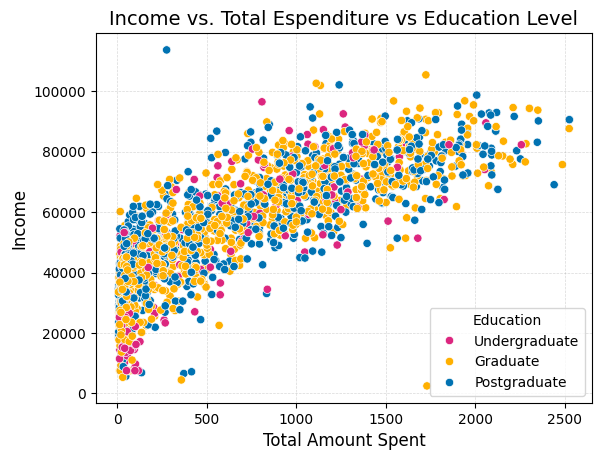

In [100]:
custom_palette = ["#dc267f","#ffb000", "#0072b2"]

sns.scatterplot(
    data=df
    , x=df['Amnt_Total_Spent']
    , y=df['Income']
    , hue=df['Education']
    , palette=custom_palette
)

plt.xlabel('Total Amount Spent', fontsize=12)
plt.ylabel('Income', fontsize=12)

plt.title('Income vs. Total Espenditure vs Education Level', fontsize=14)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.show()

<div style="background-color: #e6ffe6; border-left: 5px solid #4CAF50; padding: 10px; margin: 10px 0; border-radius: 4px;">
    <strong>Observations:</strong> The scatter graph reveals a positive correlation between income and expenditure, with the majority of customers holding <strong>graduate-level</strong> education. This suggests that individuals with graduate degrees are more likely to earn higher incomes and allocate more resources towards expenditure.
</div>

---

#### **Education and Purchase Behavior**

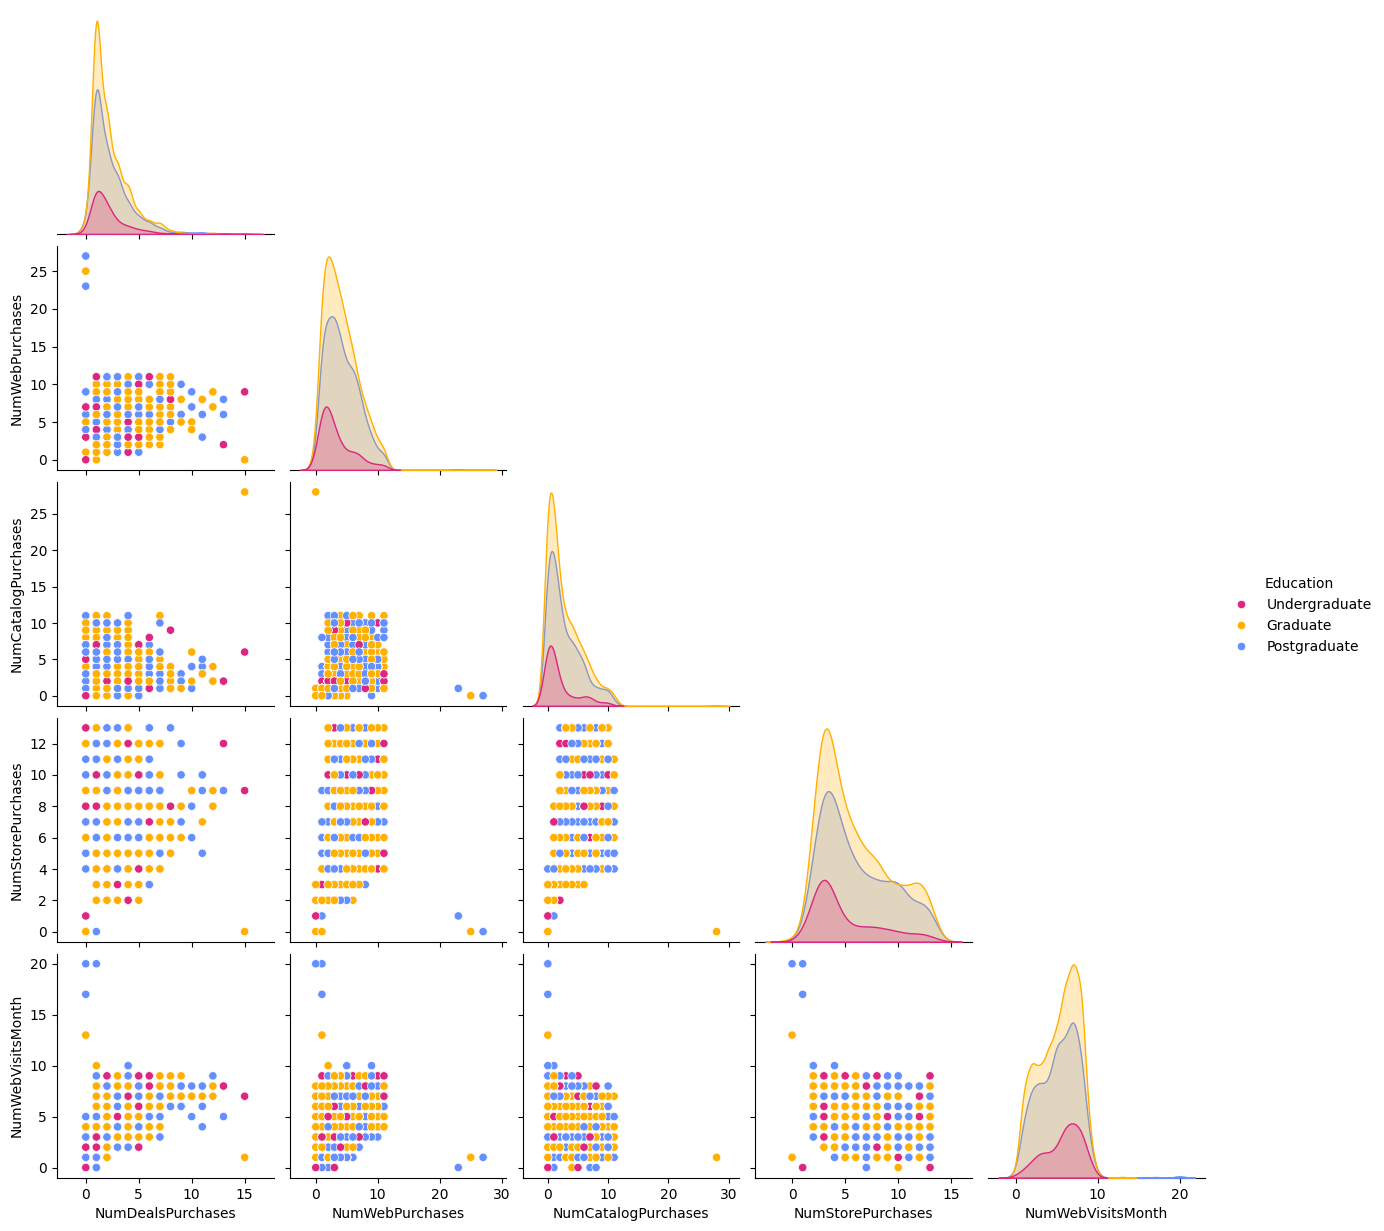

In [101]:
custom_palette = ["#dc267f", "#ffb000", "#648fff"]

sns.pairplot(
    sub_df_catg
    , hue='Education'
    , vars=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
    , corner=True
    , palette=custom_palette
)

plt.show()

<!-- Quick Comment - Summary - Key Findings - Insights - Results - Takeaways - Observations - Analysis Summary - Executive Summary -->

<div style="background-color: #e6ffe6; border-left: 5px solid #4CAF50; padding: 10px; margin: 10px 0; border-radius: 4px;">
    <strong>Observations:</strong> The graph clearly illustrates a correlation between education level and customer purchasing habits across different channels.
    
<br/>**Education Level and Purchase Behavior**
* **Undergraduate customers** tend to make **fewer purchases** across all channels (deals, web, catalog, store) and record fewer web visits compared to customers with higher education levels.
* Conversely, **customers with a graduate education** demonstrate **the highest number of purchases**, even exceeding postgraduate customers. This reinforces their importance as a target demographic.
</div>

---

In [102]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Is_Couple', 'Children',
       'Family_Size', 'Has_Child', 'Customer_Lifespan', 'Age',
       'Amnt_Total_Spent', 'Num_Total_Channels_Purchases',
       'Num_Total_Accepted_Cmp'],
      dtype='object')

In [103]:
df.to_csv('../data/cleaned.csv', sep='\t', index=False)

<div style="background-color: #FFFACD; border-left: 6px solid #FFD700; padding: 10px; border-radius: 5px;">
    <h4>&#x1F680; What's Next?</h4>
    <p>With our exploratory data analysis complete, we now have a solid understanding of the dataset. Please proceed to the <code>modeling.ipynb</code> notebook to see the segmentation modeling implementation.</p>
</div>

***